In [1]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from prophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [3]:
df_acum= pd.read_excel('df_definitivo.xlsx')

In [4]:
df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)

df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')


In [5]:
df_acum

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción
0,ALBACETE,ABENGIBRE,ABENGIBRE,2250,"AVENIDA CASTILLA LA MANCHA, 26","-1,539167","39,211417",1.799,No disponible,No disponible,"1,829",No disponible,Nº 10.935,L-D: 07:00-22:00,04-04-2022
1,ALBACETE,ALATOZ,ALATOZ,2152,"CR CM-332, 46,4","-1,346083","39,100389",1.869,No disponible,"2,000","1,950","2,000",REPSOL,L-D: 7:00-23:00,04-04-2022
3,ALBACETE,ALBACETE,ALBACETE,2001,"AVENIDA 1º DE MAYO, S/N","-1,868500","38,985667",1.809,No disponible,"1,899","1,829","1,859",CARREFOUR,L-S: 08:00-22:00; D: 09:00-21:00,04-04-2022
4,ALBACETE,ALBACETE,ALBACETE,2001,CALLE PRINCIPE DE ASTURIAS (POLÍGONO DE ROMICA...,"-1,832000","39,054694",1.769,No disponible,"1,911","1,849","1,939",BP ROMICA,L-D: 06:00-21:30,04-04-2022
5,ALBACETE,ALBACETE,ALBACETE,2001,"CALLE FEDERICO GARCIA LORCA, 1","-1,849833","39,000861",1.677,No disponible,No disponible,"1,757",No disponible,PLENOIL,L-D: 24H,04-04-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256439,ZARAGOZA,Zaragoza,VILLARRAPA,50692,"AUTOVIA A-68 KM. 258,25","-1,078944","41,740389",1.879,No disponible,"1,999","1,899","1,979",REPSOL,L-V: 05:00-22:00; S-D: 08:00-22:00,29-04-2022
256440,ZARAGOZA,Zaragoza,ZARAGOZA,50197,"AVENIDA DIAGONAL PLAZA, 22","-0,990111","41,636528",1.899,No disponible,"2,049","1,929","1,999",REPSOL,L-V: 06:00-22:00; S: 08:00-15:00,29-04-2022
256443,ZARAGOZA,Zuera,ZUERA,50800,"CARRETERA N-330A KM. 24,000","-0,794000","41,857000",1.875,No disponible,"2,015","1,899","1,979",REPSOL,L-D: 06:00-22:00,29-04-2022
256444,ZARAGOZA,Zuera,ZUERA,50800,"CALLE AUSTRIA, 11,17","-0,782833","41,883583",1.817,No disponible,No disponible,"1,828","1,868",COOPERATIVA SAN LICER,L-D: 24H,29-04-2022


In [6]:
df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
df_prophet_espana.columns = ['ds', 'y']
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      22 non-null     object 
 1   y       22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [7]:
#df_grafico[0]['Precio gasolina 95 E5'] = df_grafico[0]['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasóleo A'] = df_grafico[0]['Precio gasóleo A'].apply(lambda x: x.replace(',','.'))
#df_grafico[0]['Precio gasolina 95 E5']=df_grafico[0]['Precio gasolina 95 E5'].astype('float64')
#df_grafico[0]['Precio gasóleo A']=df_grafico[0]['Precio gasóleo A'].astype('float64')

In [8]:
format_data = '%d-%m-%Y'
df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))


In [9]:
df_prophet_espana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      22 non-null     datetime64[ns]
 1   y       22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 480.0 bytes


In [ ]:
my_model = Prophet(interval_width=0.8, yearly_seasonality=True)

In [ ]:
my_model.fit(df_prophet_espana)

In [12]:
future = my_model.make_future_dataframe(periods=7)
future

robability =     142.93. Improved by 1.75233.
Iteration 29. Log joint probability =     148.45. Improved by 5.52067.
Iteration 30. Log joint probability =    148.713. Improved by 0.262777.
Iteration 31. Log joint probability =    148.853. Improved by 0.140347.
Iteration 32. Log joint probability =    151.366. Improved by 2.51283.
Iteration 33. Log joint probability =    155.229. Improved by 3.86254.
Iteration 34. Log joint probability =    155.245. Improved by 0.0165569.
Iteration 35. Log joint probability =    155.326. Improved by 0.0803662.
Iteration 36. Log joint probability =    167.621. Improved by 12.2953.
Iteration 37. Log joint probability =    182.346. Improved by 14.7248.
Iteration 38. Log joint probability =    182.867. Improved by 0.521038.
Iteration 39. Log joint probability =     183.76. Improved by 0.892962.
Iteration 40. Log joint probability =     199.63. Improved by 15.8706.
Iteration 41. Log joint probability =    215.498. Improved by 15.8675.
Iteration 42. Log joint

,ds
0,2022-04-04
1,2022-04-05
2,2022-04-09
3,2022-04-10
4,2022-04-11
5,2022-04-12
6,2022-04-14
7,2022-04-15
8,2022-04-16
9,2022-04-17


Log joint probability =    377.656. Improved by 1.15831.
Iteration 85. Log joint probability =    377.974. Improved by 0.317951.
Iteration 86. Log joint probability =    378.668. Improved by 0.694198.
Iteration 87. Log joint probability =    378.971. Improved by 0.302764.
Iteration 88. Log joint probability =    416.871. Improved by 37.9004.
Iteration 89. Log joint probability =    419.664. Improved by 2.79287.
Iteration 90. Log joint probability =    421.192. Improved by 1.52831.
Iteration 91. Log joint probability =    423.348. Improved by 2.15519.
Iteration 92. Log joint probability =    424.583. Improved by 1.23579.
Iteration 93. Log joint probability =    425.508. Improved by 0.92447.
Iteration 94. Log joint probability =    426.361. Improved by 0.853227.
Iteration 95. Log joint probability =    426.996. Improved by 0.635268.
Iteration 96. Log joint probability =    427.547. Improved by 0.550644.
Iteration 97. Log joint probability =    428.027. Improved by 0.480247.
Iteration 98.

In [13]:
 predict= my_model.predict(future)

1. Improved by 0.0626785.
Iteration 153. Log joint probability =    436.871. Improved by 0.210183.
Iteration 154. Log joint probability =    436.996. Improved by 0.12465.
Iteration 155. Log joint probability =    437.029. Improved by 0.0334119.
Iteration 156. Log joint probability =    437.066. Improved by 0.0371573.
Iteration 157. Log joint probability =     437.11. Improved by 0.043691.
Iteration 158. Log joint probability =    437.225. Improved by 0.114894.
Iteration 159. Log joint probability =    437.547. Improved by 0.322362.
Iteration 160. Log joint probability =    437.767. Improved by 0.219299.
Iteration 161. Log joint probability =    438.272. Improved by 0.505586.
Iteration 162. Log joint probability =    438.652. Improved by 0.380125.
Iteration 163. Log joint probability =    438.811. Improved by 0.15824.
Iteration 164. Log joint probability =    438.909. Improved by 0.0983112.
Iteration 165. Log joint probability =    439.011. Improved by 0.102212.
Iteration 166. Log joint

Iteration 354. Log joint probability =     445.99. Improved by 0.0133378.
Iteration 355. Log joint probability =    445.992. Improved by 0.00146589.
Iteration 356. Log joint probability =    446.002. Improved by 0.01008.
Iteration 357. Log joint probability =    446.003. Improved by 0.00112352.
Iteration 358. Log joint probability =    446.008. Improved by 0.00456796.
Iteration 359. Log joint probability =     446.01. Improved by 0.00279269.
Iteration 360. Log joint probability =    446.012. Improved by 0.00145627.
Iteration 361. Log joint probability =    446.015. Improved by 0.00305115.
Iteration 362. Log joint probability =    446.016. Improved by 0.000720587.
Iteration 363. Log joint probability =    446.018. Improved by 0.00278542.
Iteration 364. Log joint probability =    446.021. Improved by 0.00309629.
Iteration 365. Log joint probability =    446.027. Improved by 0.00559731.
Iteration 366. Log joint probability =    446.029. Improved by 0.0016559.
Iteration 367. Log joint prob

In [14]:
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)

,ds,yhat,yhat_lower,yhat_upper
20,2022-04-28,1.839000,1.839000,1.839000
21,2022-04-29,1.854000,1.854000,1.854000
22,2022-04-30,1.843833,1.840560,1.846624
23,2022-05-01,1.808895,1.796286,1.820373
24,2022-05-02,1.740809,1.715132,1.764490
25,2022-05-03,1.635321,1.595246,1.674808
26,2022-05-04,1.480054,1.425155,1.535750
27,2022-05-05,1.302997,1.234047,1.376845
28,2022-05-06,1.088759,1.001420,1.184502


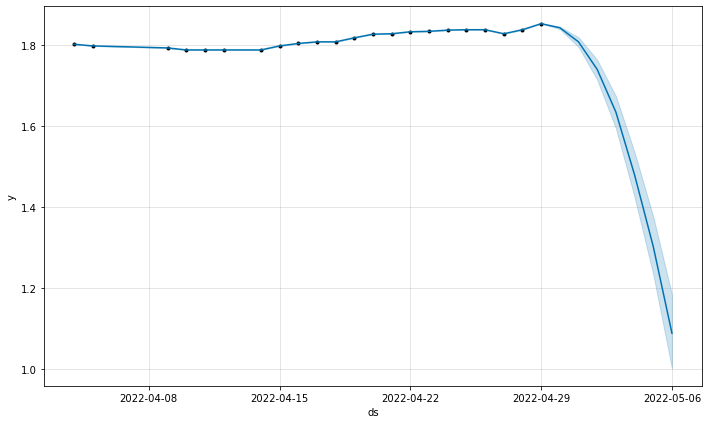

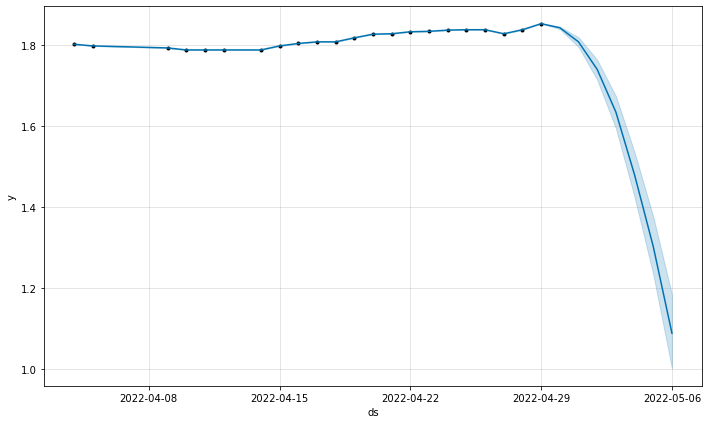

In [15]:
my_model.plot(predict, uncertainty=True)

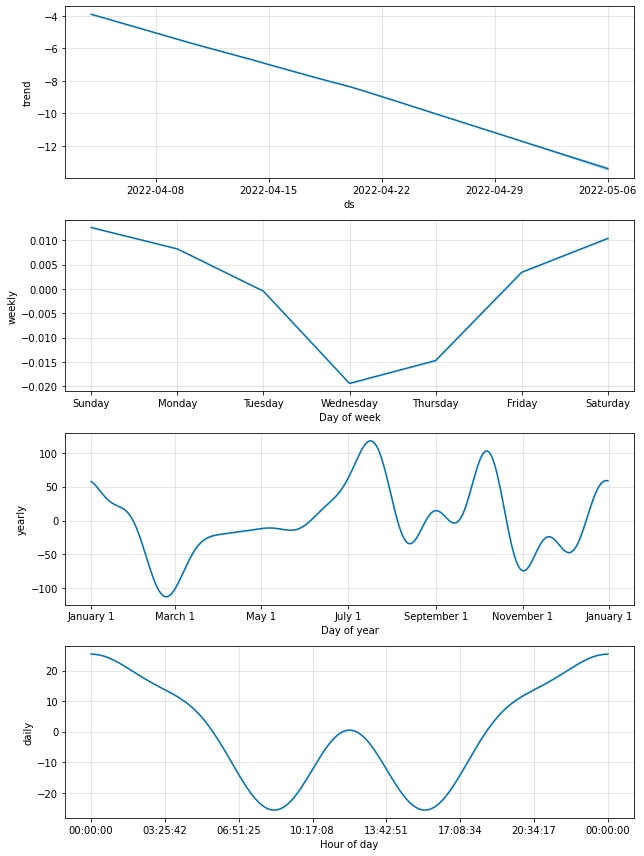

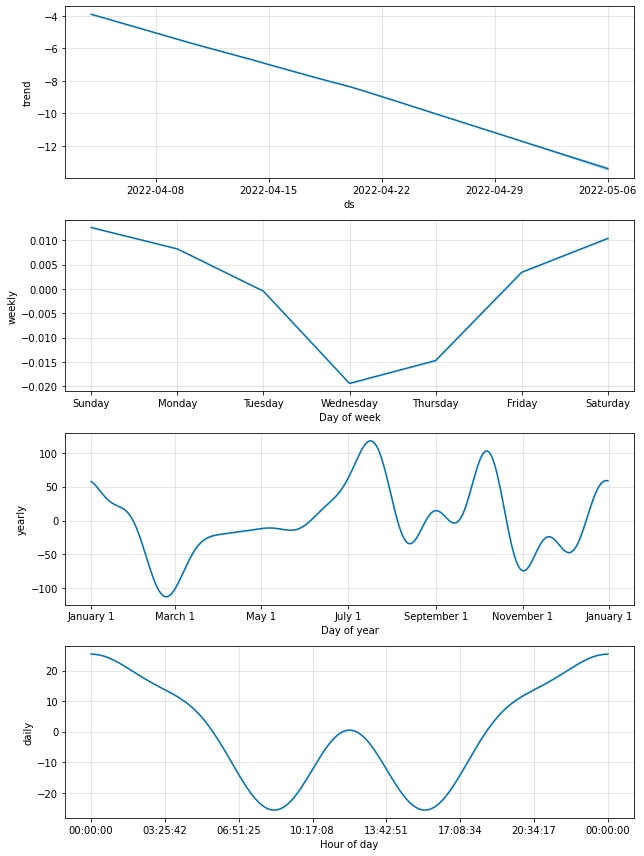

In [16]:
my_model.plot_components(predict)

## funciones pipeline

In [2]:
def prediction():
    df_acum['Precio gasolina 95 E5'] = df_acum['Precio gasolina 95 E5'].apply(lambda x: x.replace(',','.'))
    df_acum.drop(df_acum.loc[df_acum['Precio gasolina 95 E5']=='No disponible'].index, inplace=True)
    df_acum['Precio gasolina 95 E5']=df_acum['Precio gasolina 95 E5'].astype('float64')
    df_todas_gasolineras = df_acum.groupby(["Fecha de extracción"])["Precio gasolina 95 E5"].median()
    df_prophet_espana=pd.DataFrame(df_todas_gasolineras).reset_index()
    df_prophet_espana.columns = ['ds', 'y']
    format_data = '%d-%m-%Y'
    df_prophet_espana['ds']=df_prophet_espana['ds'].apply(lambda x: datetime.datetime.strptime(x,format_data))
    my_model = Prophet(interval_width=0.8, daily_seasonality=True)
    my_model.fit(df_prophet_espana)
    future = my_model.make_future_dataframe(periods=7)
    predict= my_model.predict(future)
    predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)
    my_model.plot(predict, uncertainty=True)
    my_model.plot_components(predict)
    return my_model.plot(predict, uncertainty=True)
    

In [4]:
prediction()

NameError: name 'df_acum' is not defined